In [1]:
import os
os.chdir('..')

In [2]:
from model.network import Converter
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
plt.rcParams["figure.figsize"] = (20,20)

In [4]:
import os
import pickle

import numpy as np
import tensorflow as tf

from keras import backend as K
from keras import optimizers, losses, regularizers
from keras.layers import Conv2D, Dense, UpSampling2D, LeakyReLU, Activation
from keras.layers import Layer, Input, Reshape, Lambda, Flatten, Concatenate, Embedding, GaussianNoise
from keras.models import Model, load_model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback
from keras.applications import vgg16
from keras_lr_multiplier import LRMultiplier
from assets import AssetManager

In [5]:
n_images = 10
base_dir = 'results'
model_name = 'smallnorb_model_strict_50_128'
data_name = 'smallnorb_strict_class_test'

assets = AssetManager(base_dir)

In [6]:
data = np.load(assets.get_preprocess_file_path(data_name))
imgs, classes, contents, n_classes = data['imgs'], data['classes'], data['contents'], data['n_classes']
imgs = imgs.astype(np.float32) / 255.0

curr_imgs = imgs[:n_images,]

In [7]:
converter = Converter.load( assets.get_model_dir(model_name), include_encoders=True)

content_codes = converter.content_encoder.predict(curr_imgs)
class_codes = converter.class_encoder.predict(curr_imgs)
class_adain_params = converter.class_modulation.predict(class_codes)

loading models...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



vgg arch:
Model: "vgg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
vgg_normalization_1 (VggNorm (None, 64, 64, 3)         0         
_________________________________________________________________
model_1 (Model)              [(None, 64, 64, 64), (Non 14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________



In [8]:
blank = np.zeros_like(curr_imgs[0])
output = [np.concatenate([blank] + list(curr_imgs), axis=1)]
for i in range(n_images):
    converted_imgs = [curr_imgs[i]] + [
        converter.generator.predict([content_codes[[j]], class_adain_params[[i]]])[0]
        for j in range(n_images)
    ]

    output.append(np.concatenate(converted_imgs, axis=1))

merged_img = np.concatenate(output, axis=0)

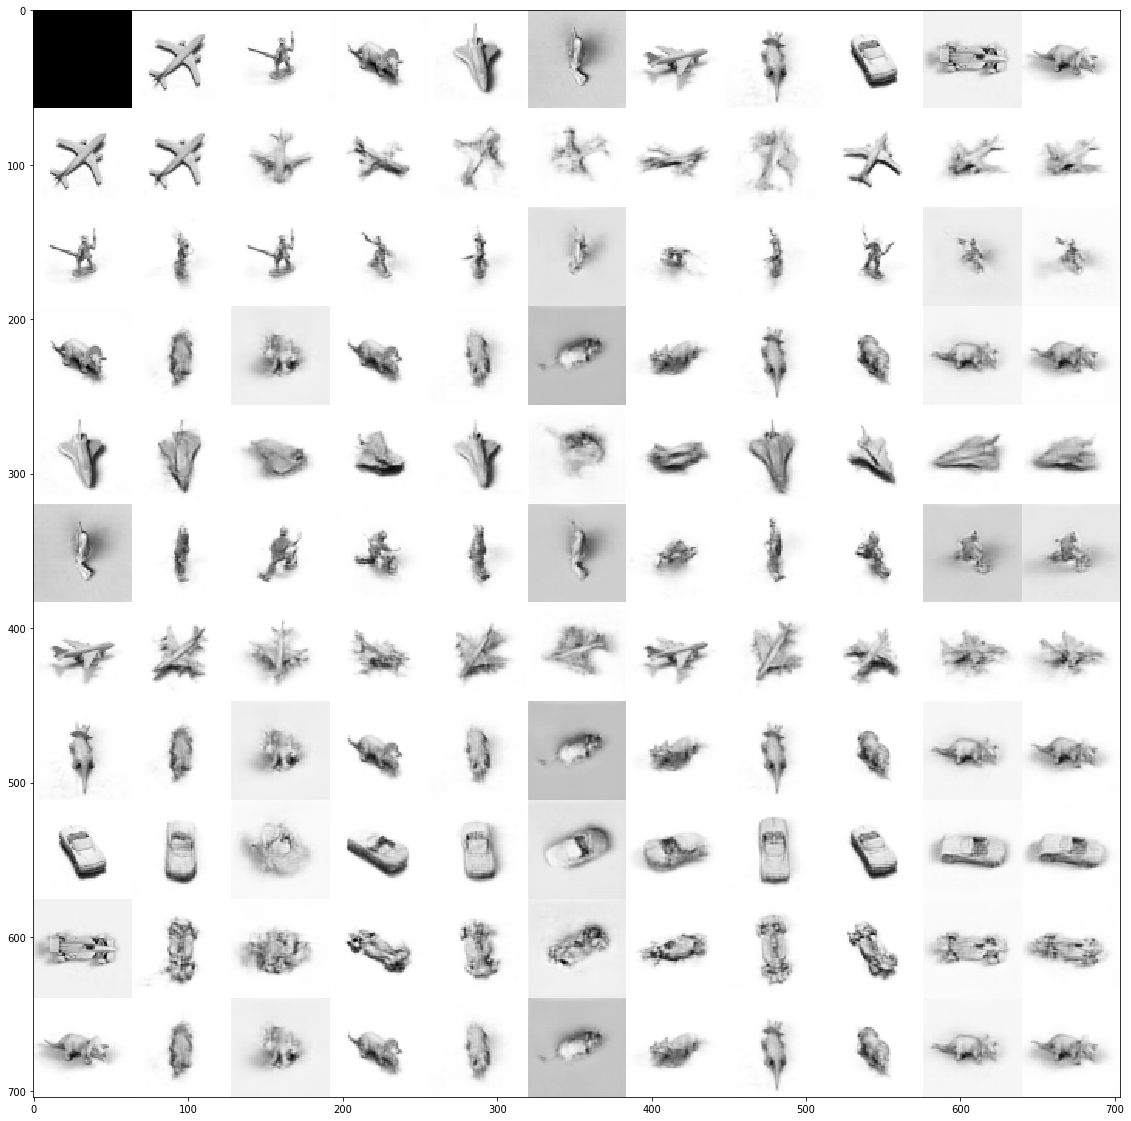

In [9]:
plt.imshow(np.squeeze(merged_img), cmap='gray')

In [14]:
print(converter.config.class_dim, converter.config.content_dim)

50 128
